In [67]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [68]:
m0=7
S = nx.complete_graph(m0)

In [69]:
m=4
node_list = [node for node in S.nodes()]

In [70]:
for i in range(m, 10000):
    # Choose m nodes at random from the pool of potential nodes
    targets = random.sample(node_list, m)
    
    # Add edges between the new node and the chosen nodes
    S.add_node(i)
    for target in targets:
        S.add_edge(i, target)
    
    # Add the new node to the pool of potential nodes
    node_list.append(i)
    for target in targets:
        if S.degree(target) == m-1:
            node_list.append(target)
    
    # Print the progress
    if i % 1000 == 0:
        print(f"Generated {i} nodes...")

Generated 1000 nodes...
Generated 2000 nodes...
Generated 3000 nodes...
Generated 4000 nodes...
Generated 5000 nodes...
Generated 6000 nodes...
Generated 7000 nodes...
Generated 8000 nodes...
Generated 9000 nodes...


In [71]:
print(S)

Graph with 10000 nodes and 39987 edges


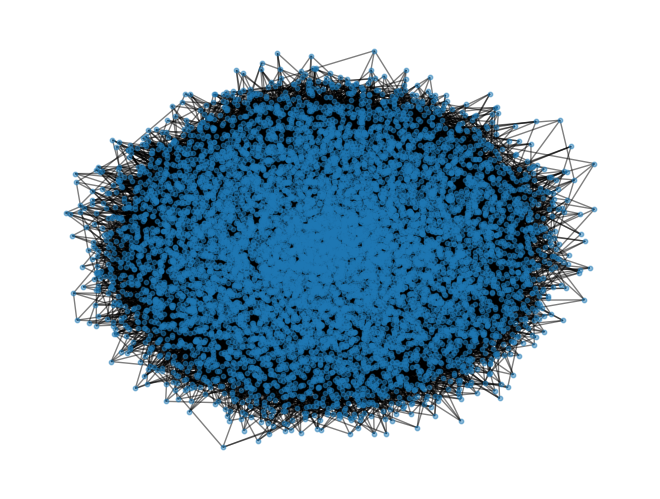

In [72]:
pos = nx.spring_layout(S, seed=42)
nx.draw(S, pos, node_size=10, alpha=0.5)


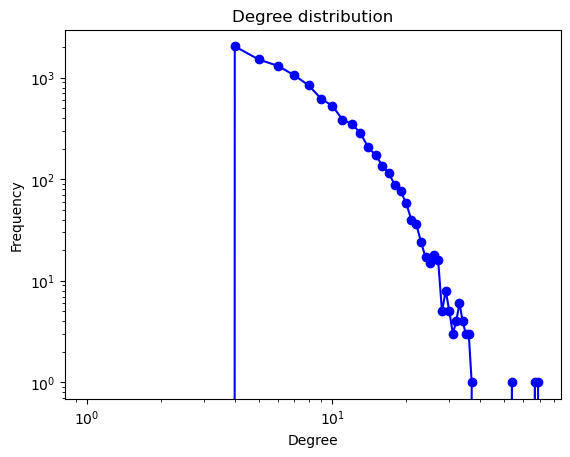

The node with the highest degree is 4 with degree 69


In [73]:
# Plot the degree distribution
degrees = S.degree()
degree_freq = nx.degree_histogram(S)
plt.loglog(degree_freq, 'b-', marker='o')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Find the node with the highest degree and the time it came into the network
max_degree = 0
max_degree_node = None
for node, degree in degrees:
    if degree > max_degree:
        max_degree = degree
        max_degree_node = node

print(f"The node with the highest degree is {max_degree_node} with degree {max_degree}")

In [74]:
time_of_entry = list(S.nodes()).index(max_degree_node) + 1

In [75]:
# Find the node with the highest degree and its time interval
print("Node with highest degree:", max_degree_node)
print("Degree of node with highest degree:", max_degree)
print("Time interval when node with highest degree was added:", time_of_entry)

Node with highest degree: 4
Degree of node with highest degree: 69
Time interval when node with highest degree was added: 5


In [76]:
# Get the degrees and time of entry for each node.
degrees = []
time_of_entry = []
for node in S.nodes():
    degrees.append(S.degree[node])
    time_of_entry.append(list(S.nodes()).index(node) + 1)

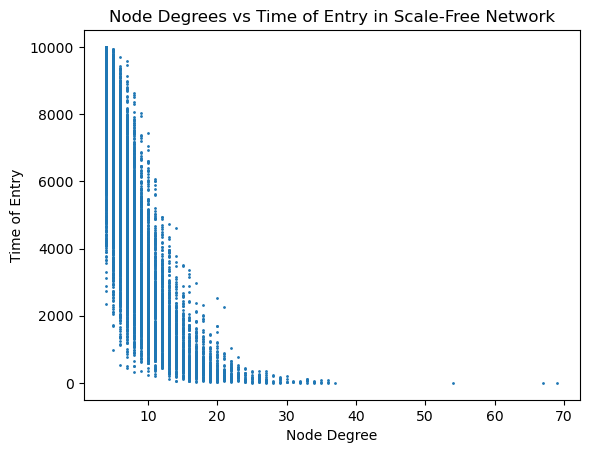

In [77]:
# Plot the node degrees versus time of entry.
plt.scatter(degrees, time_of_entry, s=1)
plt.title("Node Degrees vs Time of Entry in Scale-Free Network")
plt.xlabel("Node Degree")
plt.ylabel("Time of Entry")
plt.show()

In [78]:
import matplotlib.pyplot as plt

# Generate the scale-free network S with 10,000 nodes
n = 10000
m = 5
S = nx.barabasi_albert_graph(n, m)

In [79]:
# Calculate the centrality measures of all nodes in S
degree_centrality = nx.degree_centrality(S)
closeness_centrality = nx.closeness_centrality(S)
betweenness_centrality = nx.betweenness_centrality(S)
eigenvector_centrality = nx.eigenvector_centrality(S)

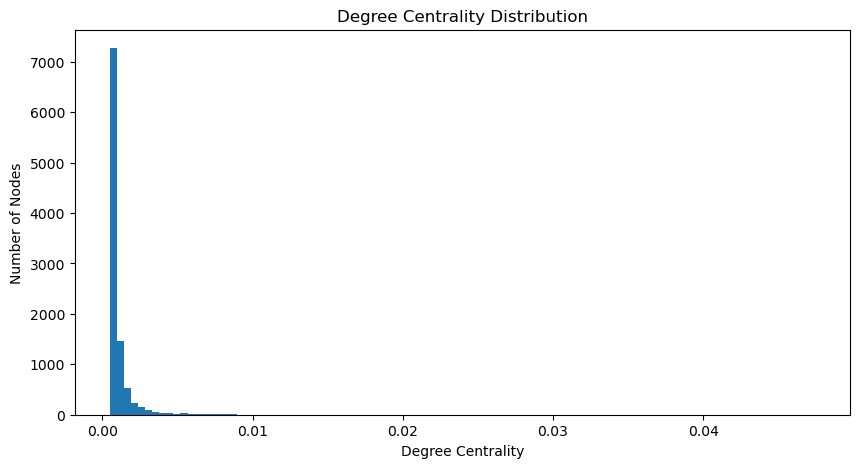

In [80]:
# Visualize the degree centrality values
plt.figure(figsize=(10, 5))
plt.hist(list(degree_centrality.values()), bins=100)
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.title('Degree Centrality Distribution')
plt.show()

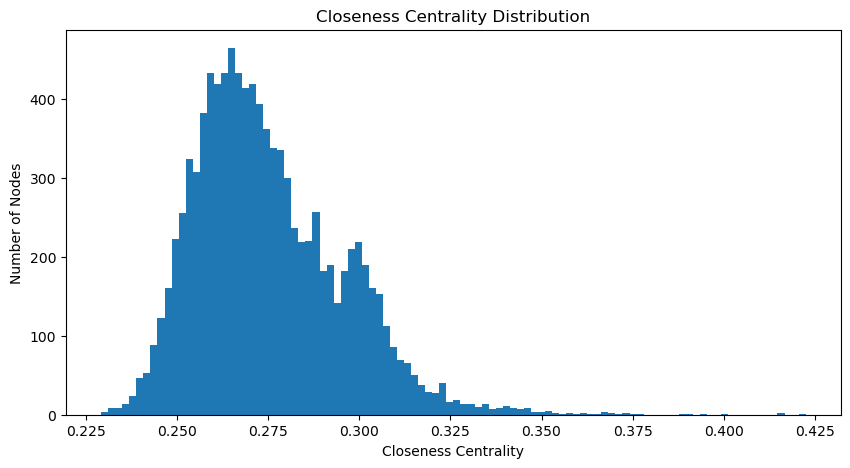

In [81]:
# Visualize the closeness centrality values
plt.figure(figsize=(10, 5))
plt.hist(list(closeness_centrality.values()), bins=100)
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.title('Closeness Centrality Distribution')
plt.show()

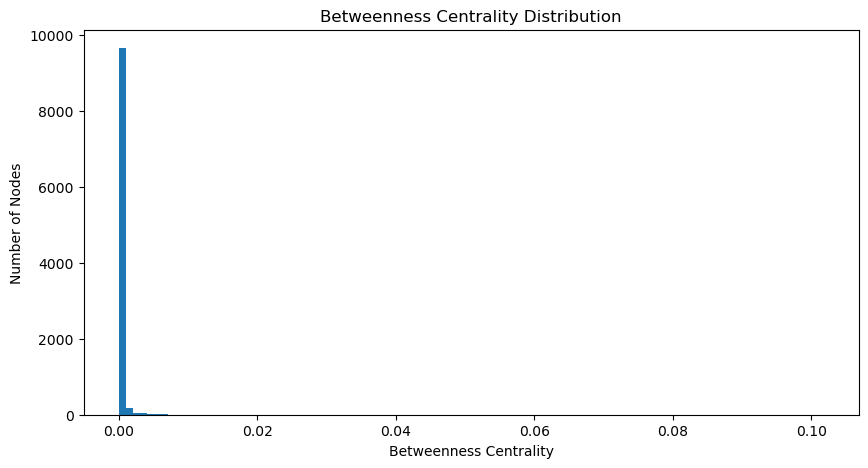

In [82]:
# Visualize the betweenness centrality values
plt.figure(figsize=(10, 5))
plt.hist(list(betweenness_centrality.values()), bins=100)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.title('Betweenness Centrality Distribution')
plt.show()


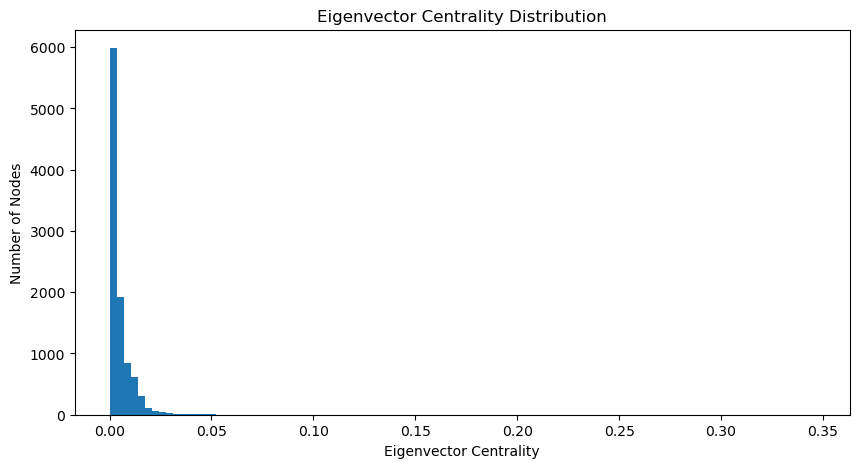

In [83]:
# Visualize the eigenvector centrality values
plt.figure(figsize=(10, 5))
plt.hist(list(eigenvector_centrality.values()), bins=100)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of Nodes')
plt.title('Eigenvector Centrality Distribution')
plt.show()

In [89]:
pip install --force-reinstall networkx==2.3

     ---------------------------------------- 1.7/1.7 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556005 sha256=73371f7379bae49d20f252107b4808b1a92a067b74518daca3ec60984d33e7a2
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\63\ad\ed\4378ef3136c1cb8dd9e1c67a1ac2675e559f0a10fc4b63e3e2
Successfully built networkx
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
Note: you may need to restart the kernel to use updated packages.


In [107]:
# Find the connected components of the graph
components = list(nx.connected_components(S))

# Select the largest component as the giant component
giant = S.subgraph(max(components, key=len))


In [113]:
print(giant)

Graph with 10000 nodes and 49975 edges


In [110]:
print("Number of nodes in the giant component:", len(giant))

Number of nodes in the giant component: 10000


In [111]:
# Calculate the ratio of nodes in the giant component to the total number of nodes in the graph.
ratio = len(giant) / S.number_of_nodes()

print("Ratio of nodes in giant component G to total number of nodes in S:", ratio)

Ratio of nodes in giant component G to total number of nodes in S: 1.0


In [124]:
# import random

# # Choose a random node in the graph.
# # start_node = random.choice(list(S.nodes()))

# # Define the probability values to test.
# p_values = [0.25, 0.5, 0.75, 1]

# # Define the number of times to repeat the experiment for each probability value.
# num_trials = 10

# # Iterate over each probability value and run the experiment.
# for p in p_values:
#     # Initialize a list to store the number of steps required for each trial.
#     steps_list = []
    
#     # Repeat the experiment num_trials times.
#     for i in range(num_trials):
#         start_node = random.choice(list(S.nodes()))
#         # Initialize a dictionary to store the current state of each node.
#         node_states = {node: 0 for node in S.nodes()}
#         node_states[start_node] = 1
        
#         # Initialize a list to store the nodes that have received the information.
#         informed_nodes = [start_node]
        
#         # Initialize a counter for the number of steps taken.
#         num_steps = 0
        
#         # Continue until all nodes in the graph have received the information.
#         while len(informed_nodes) < S.number_of_nodes():
#             # Increment the step counter.
#             num_steps += 1
            
#             # Iterate over all nodes that are currently informed.
#             for node in informed_nodes:
#                 # Iterate over all neighbors of the current node.
#                 for neighbor in S.neighbors(node):
#                     # If the neighbor is not already informed, roll a probability dice to determine if it becomes informed.
#                     if node_states[neighbor] == 0 and random.random() <= p:
#                         node_states[neighbor] = 1
#                         informed_nodes.append(neighbor)
        
#         # Append the number of steps required to the steps list.
#         steps_list.append(num_steps)
        
#     # Calculate the average number of steps required and print the result.
#     avg_steps = sum(steps_list) / num_trials
#     print("Steps required to reach maximum number of nodes with p = {}: {}".format(p, steps))
#     print("Average number of steps required for p =", p, "after performing 10 trials:", avg_steps)


Steps required to reach maximum number of nodes with p = 0.25: 34
Average number of steps required for p = 0.25 after performing 10 trials: 6.9
Steps required to reach maximum number of nodes with p = 0.5: 34
Average number of steps required for p = 0.5 after performing 10 trials: 2.8
Steps required to reach maximum number of nodes with p = 0.75: 34
Average number of steps required for p = 0.75 after performing 10 trials: 2.0
Steps required to reach maximum number of nodes with p = 1: 34
Average number of steps required for p = 1 after performing 10 trials: 1.0


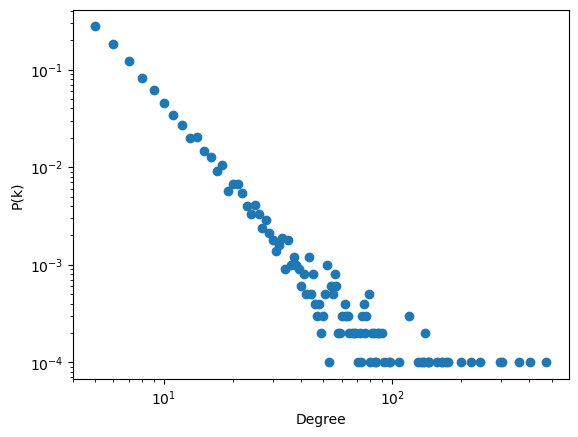

In [116]:
import numpy as np
degree_sequence = sorted([d for n, d in S.degree()], reverse=True)
degree_count = np.array(np.unique(degree_sequence, return_counts=True)).T

# Compute the probability of degree
prob_degree = degree_count[:,1] / degree_count[:,1].sum()

# Plot the probability of degree vs degree
plt.plot(degree_count[:,0], prob_degree, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.show()

In [125]:
import random

# Define the probability values to test.
p_values = [0.25, 0.5, 0.75, 1]

# Define the number of times to repeat the experiment for each probability value.
num_trials = 10

# Iterate over each probability value and run the experiment.
for p in p_values:
    # Initialize a list to store the number of steps required for each trial.
    steps_list = []
    
    # Repeat the experiment num_trials times.
    for i in range(num_trials):
        # Initialize a dictionary to store the current state of each node.
        node_states = {node: 0 for node in S.nodes()}
        
        # Choose a random node to start the diffusion.
        start_node = random.choice(list(S.nodes()))
        node_states[start_node] = 1
        
        # Initialize a set to store the nodes that have received the information.
        informed_nodes = {start_node}
        
        # Initialize a counter for the number of steps taken.
        num_steps = 0
        
        # Continue until all nodes in the graph have received the information.
        while len(informed_nodes) < S.number_of_nodes():
            # Increment the step counter.
            num_steps += 1
            
            # Iterate over all nodes that are currently informed.
            for node in list(informed_nodes):
                # Iterate over all neighbors of the current node.
                for neighbor in S.neighbors(node):
                    # If the neighbor is not already informed, roll a probability dice to determine if it becomes informed.
                    if node_states[neighbor] == 0 and random.random() <= p:
                        node_states[neighbor] = 1
                        informed_nodes.add(neighbor)
                        
            # Check if all nodes in the graph have been informed.
            if len(informed_nodes) == S.number_of_nodes():
                break
        
        # Append the number of steps required to the steps list.
        steps_list.append(num_steps)
        
    # Calculate the average number of steps required and print the result.
    avg_steps = sum(steps_list) / num_trials
    print("Steps required to reach maximum number of nodes with p = {}: {}".format(p, steps))
    print("Average number of steps required for p =", p, "after performing", num_trials, "trials:", avg_steps)


Steps required to reach maximum number of nodes with p = 0.25: 34
Average number of steps required for p = 0.25 after performing 10 trials: 12.7
Steps required to reach maximum number of nodes with p = 0.5: 34
Average number of steps required for p = 0.5 after performing 10 trials: 7.6
Steps required to reach maximum number of nodes with p = 0.75: 34
Average number of steps required for p = 0.75 after performing 10 trials: 5.7
Steps required to reach maximum number of nodes with p = 1: 34
Average number of steps required for p = 1 after performing 10 trials: 5.0
